Разделение датасета по аномалиям\
Нужная структура: \
**[час, день недели, месяц, температура, влажность, total_AP_max]**

Трейн на всех:
- + original 
- + original emd 
- + original multi 
- + original multi emd 
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

Трейн на норм
- + original 
- + original emd 
- + original multi 
- + original multi emd
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from data_preparation import get_data

In [2]:
# wind r'C:/Users/Lomonosova/Downloads/iqds.22.03/iqds/ds_electricity.csv'
# mac r'/Users/veronikalomonosova/Downloads/iqds/ds_electricity.csv'
path = r'/Users/veronikalomonosova/Downloads/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# ANOM_2
## OCSVM

In [3]:
anom = elec[elec.io_id == '5f33e3c7fb3bbc2c40fb6afe'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 335773
before = 4
after = 7

In [4]:
anom

,event_timestamp,io_id,Urms,Irms,P,AP_energy,RP_energy,S_energy,NP_energy,Total_P,...,S_energy_max,NP_energy_max,Total_P_max,Total_AP_energy_max,Total_RP_energy_max,Total_S_energy_max,Total_NP_energy_max,Phase_angle_max,Voltage_angle_max,Frequency_max
0,2020-08-12 12:50:15,5f33e3c7fb3bbc2c40fb6afe,"[226.1795,227.3312,226.6573]","[5.18547272727273,5.21163636363636,5.218418181...","[1088.98454545455,1099.932,1100.82454545455]","[92.4097709090909,94.40062,97.0574181818182]",[],[],[],3289.741091,...,[],[],3318.32,283.87686,\N,\N,\N,"[-3.9,-4.5,-3.5]","[0,-120.1,119.7]",49.98
1,2020-08-12 12:52:15,5f33e3c7fb3bbc2c40fb6afe,"[223.200375,224.5578125,223.61575]","[5.20160625,5.2204875,5.20798125]","[1086.603125,1095.38375,1091.33875]","[92.454256875,94.445615,97.10223]",[],[],[],3273.325625,...,[],[],3315.01,284.01555,\N,\N,\N,"[-3.9,-4.6,-3.5]","[0,-120.1,119.7]",49.98
2,2020-08-12 12:54:15,5f33e3c7fb3bbc2c40fb6afe,"[222.848666666667,224.230333333333,223.2614]","[5.23606666666667,5.23666666666667,5.251273333...","[1094.804,1100.70266666667,1102.50066666667]","[92.481772,94.4734213333333,97.1299493333333]",[],[],[],3298.007333,...,[],[],3335.13,284.09766,\N,\N,\N,"[-4.1,-4.5,-3]","[0,-120,119.6]",49.98
3,2020-08-12 12:56:15,5f33e3c7fb3bbc2c40fb6afe,"[222.8492,224.256066666667,223.318066666667]","[5.20466,5.23501333333333,5.22603333333333]","[1089.63466666667,1101.68,1098.28466666667]","[92.5183113333333,94.51033,97.1667773333333]",[],[],[],3289.599333,...,[],[],3328.13,284.20807,\N,\N,\N,"[-3.8,-4.4,-3.3]","[0,-120.1,119.6]",49.98
4,2020-08-12 12:58:15,5f33e3c7fb3bbc2c40fb6afe,"[222.946,224.645333333333,223.462]","[5.18836,5.22684,5.20418]","[1086.50866666667,1101.58533333333,1093.697333...","[92.554436875,94.546954375,97.202916]",[],[],[],3281.791333,...,[],[],3317.75,284.31736,\N,\N,\N,"[-3.8,-4.4,-3.4]","[0,-120.1,119.6]",49.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404875,2022-02-28 23:51:10,5f33e3c7fb3bbc2c40fb6afe,"[222.656,223.875,223.64]","[0.2,0.2,0.2]","[4.19,7.88,9.25]","[19642.11374,25814.04013,20099.65757]","[613.8604,2033.51084,110.97596]","[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,...,"[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,65555.81144,2758.3472,68483.32440000001,6045.6209,"[-85.4,-80.5,-80.7]","[0,-120,119.7]",49.97
404876,2022-02-28 23:53:10,5f33e3c7fb3bbc2c40fb6afe,"[222.656,223.875,223.64]","[0.2,0.2,0.2]","[4.19,7.88,9.25]","[19642.11374,25814.04013,20099.65757]","[613.8604,2033.51084,110.97596]","[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,...,"[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,65555.81144,2758.3472,68483.32440000001,6045.6209,"[-85.4,-80.5,-80.7]","[0,-120,119.7]",49.97
404877,2022-02-28 23:55:10,5f33e3c7fb3bbc2c40fb6afe,"[222.656,223.875,223.64]","[0.2,0.2,0.2]","[4.19,7.88,9.25]","[19642.11374,25814.04013,20099.65757]","[613.8604,2033.51084,110.97596]","[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,...,"[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,65555.81144,2758.3472,68483.32440000001,6045.6209,"[-85.4,-80.5,-80.7]","[0,-120,119.7]",49.97
404878,2022-02-28 23:57:10,5f33e3c7fb3bbc2c40fb6afe,"[222.656,223.875,223.64]","[0.2,0.2,0.2]","[4.19,7.88,9.25]","[19642.11374,25814.04013,20099.65757]","[613.8604,2033.51084,110.97596]","[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,...,"[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,65555.81144,2758.3472,68483.32440000001,6045.6209,"[-85.4,-80.5,-80.7]","[0,-120,119.7]",49.97


### Оригинальные данные, одна размерность, без EMD
Трейн на всех

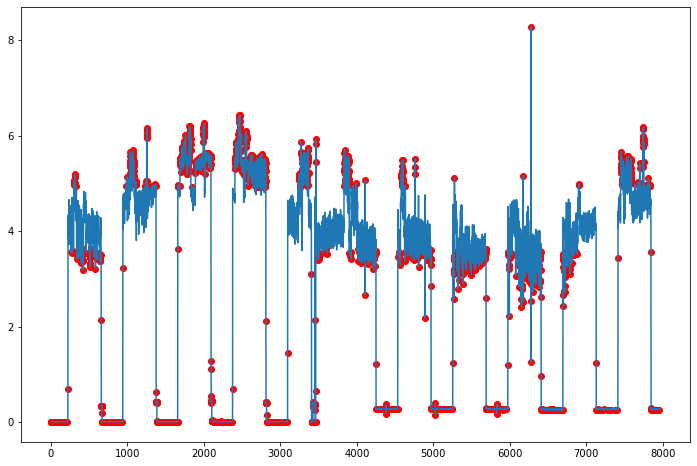

In [6]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]

model = IsolationForest(random_state=0) 
model.fit(df)
preds = model.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, одна размерность, с EMD
Трейн на всех

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


6694 7129 9
7954
7238 7954
7414 7845 10


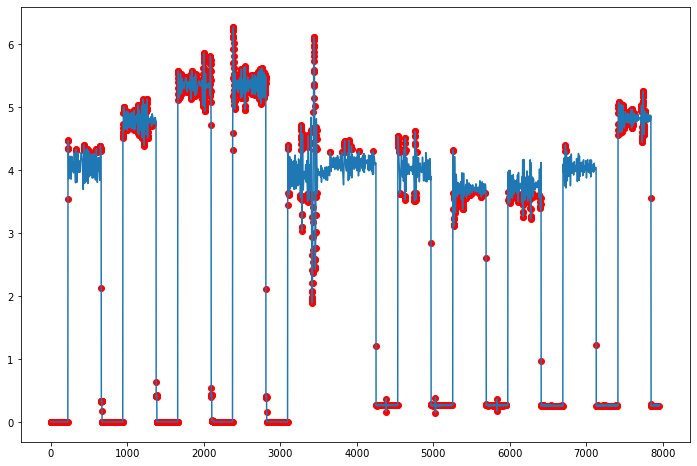

In [6]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, мульти размерность, без EMD
Трейн на всех

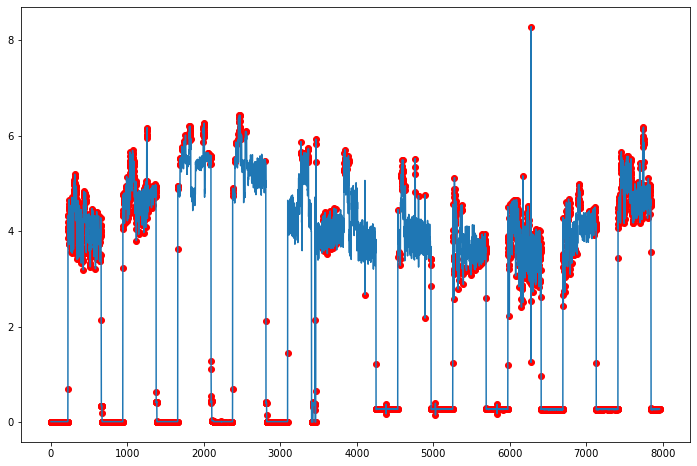

In [7]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на всех

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238
6694 7129 9
7954
7238 7954


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


7414 7845 10


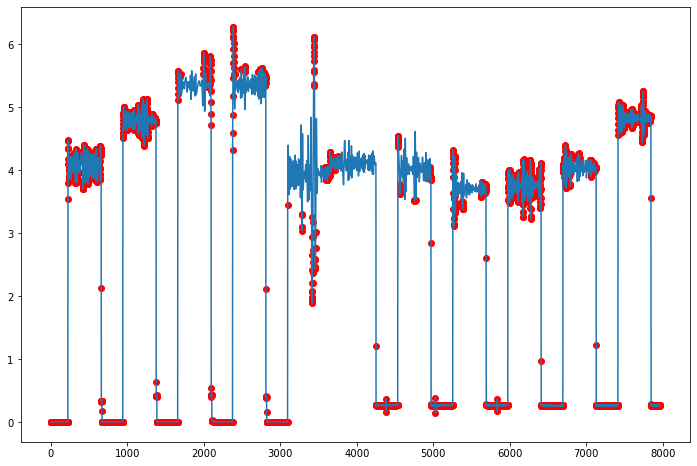

In [8]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, одна размерность, без EMD 
Трейн на норм

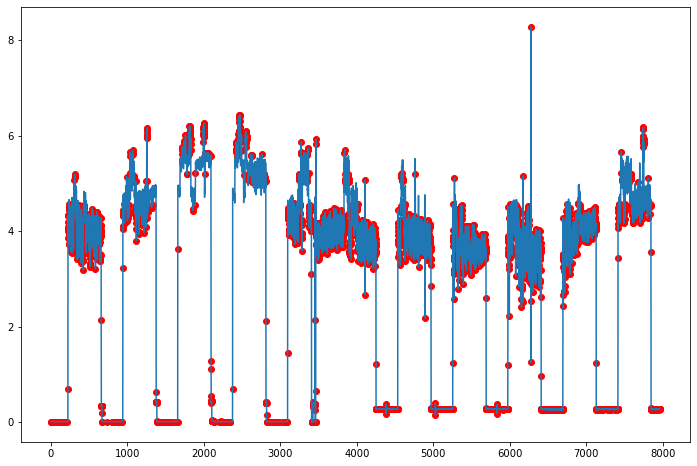

In [9]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, одна размерность, c EMD 
Трейн на норм

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
766
0 766
222 657 0
1483
766 1483


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238
6694 7129 9
7954
7238 7954
7414 7845 10


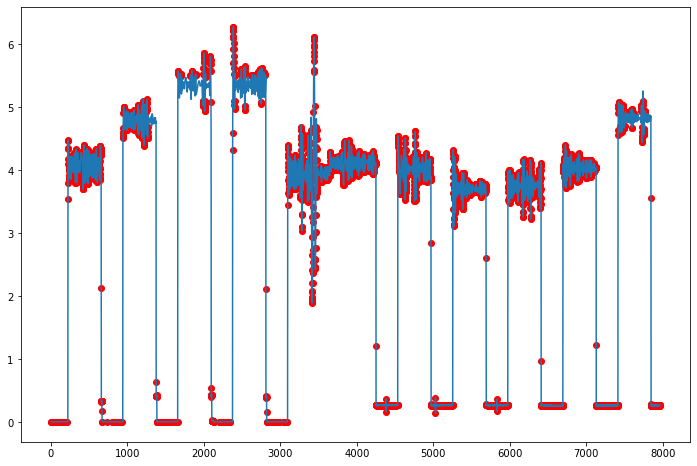

In [10]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, без EMD 
Трейн на норм

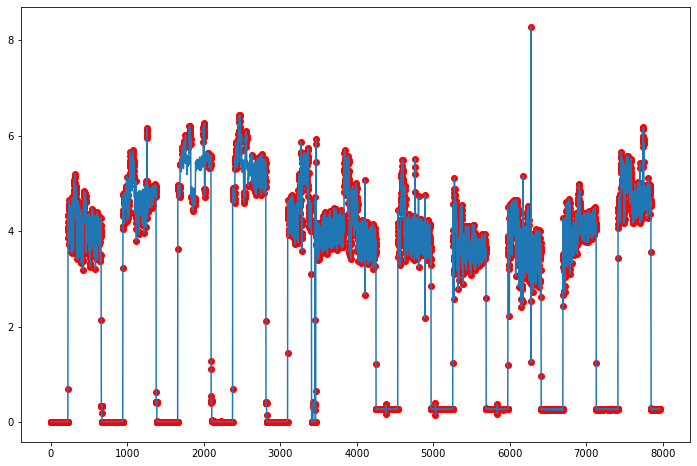

In [11]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на норм

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238
6694 7129 9
7954
7238 7954
7414 7845 10


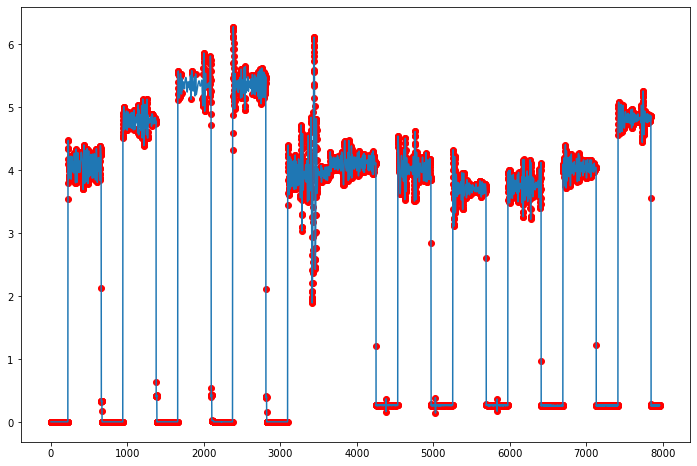

In [12]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238
6694 7129 9
7954
7238 7954


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


7414 7845 10


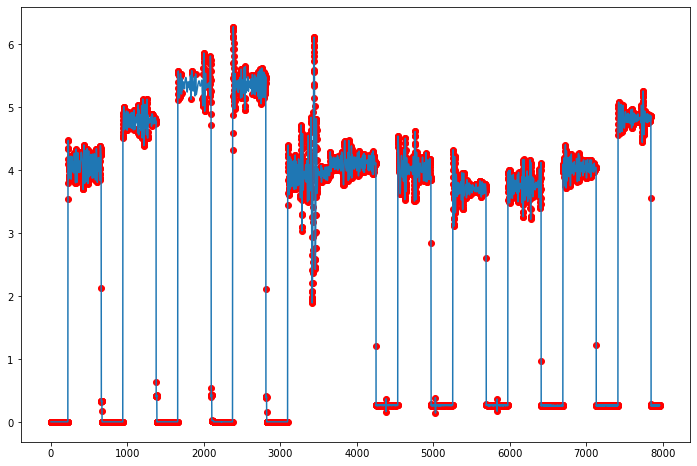

In [13]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Суточные данные, одна размерность, без EMD 
Трейн на всех

[  48  766 1483 2201 2919 3639 4359 5078 5798 6518 7238 7954]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3
2919 3639 4
3639 4359 5
4359 5078 6
5078 5798 7
5798 6518 8
6518 7238 9
7238 7954 10


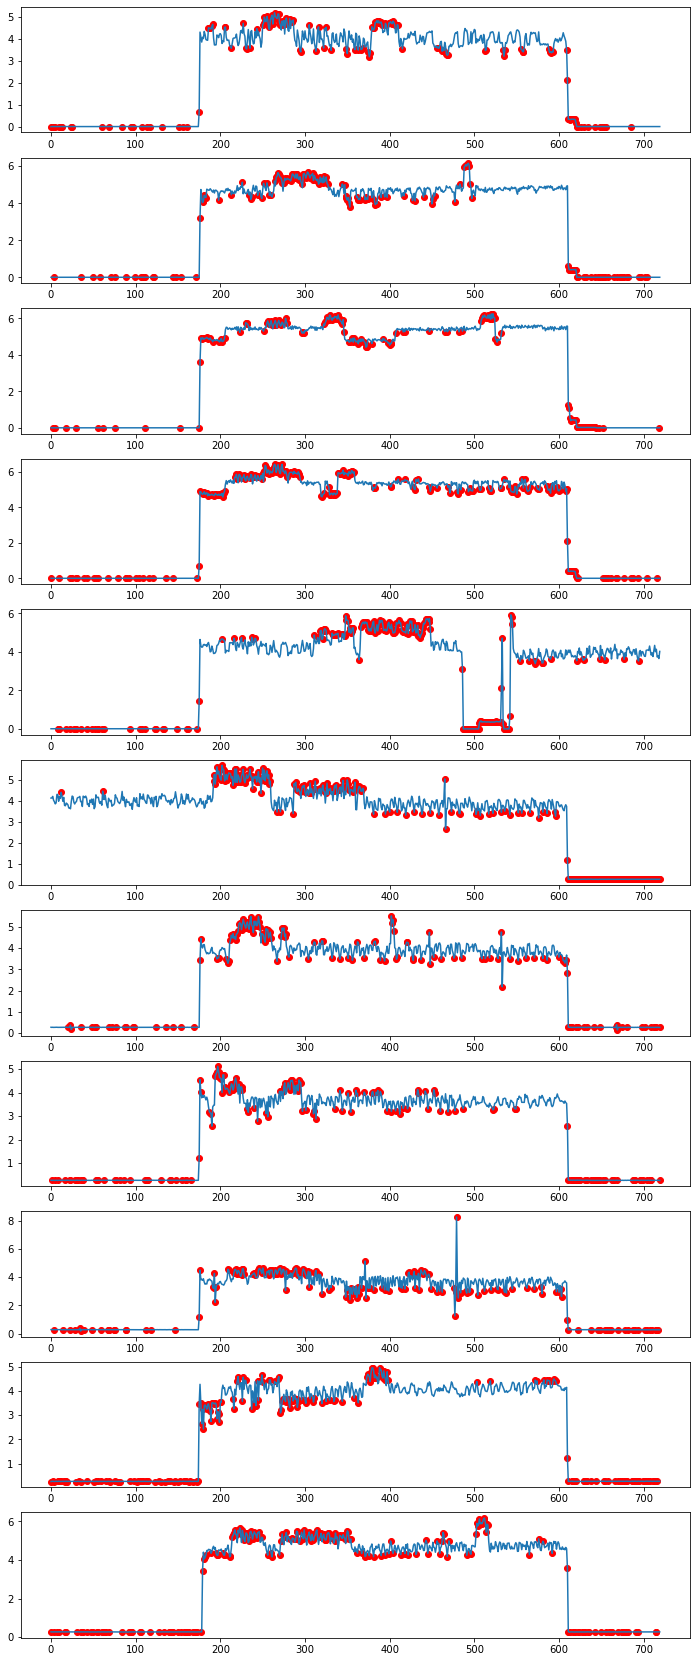

In [14]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)

i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на всех

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238
6694 7129 9
7954
7238 7954


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


7414 7845 10
[  48  766 1483 2201 2919 3639 4359 5078 5798 6518 7238 7954]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3
2919 3639 4
3639 4359 5
4359 5078 6
5078 5798 7
5798 6518 8
6518 7238 9
7238 7954 10
(11, 720)


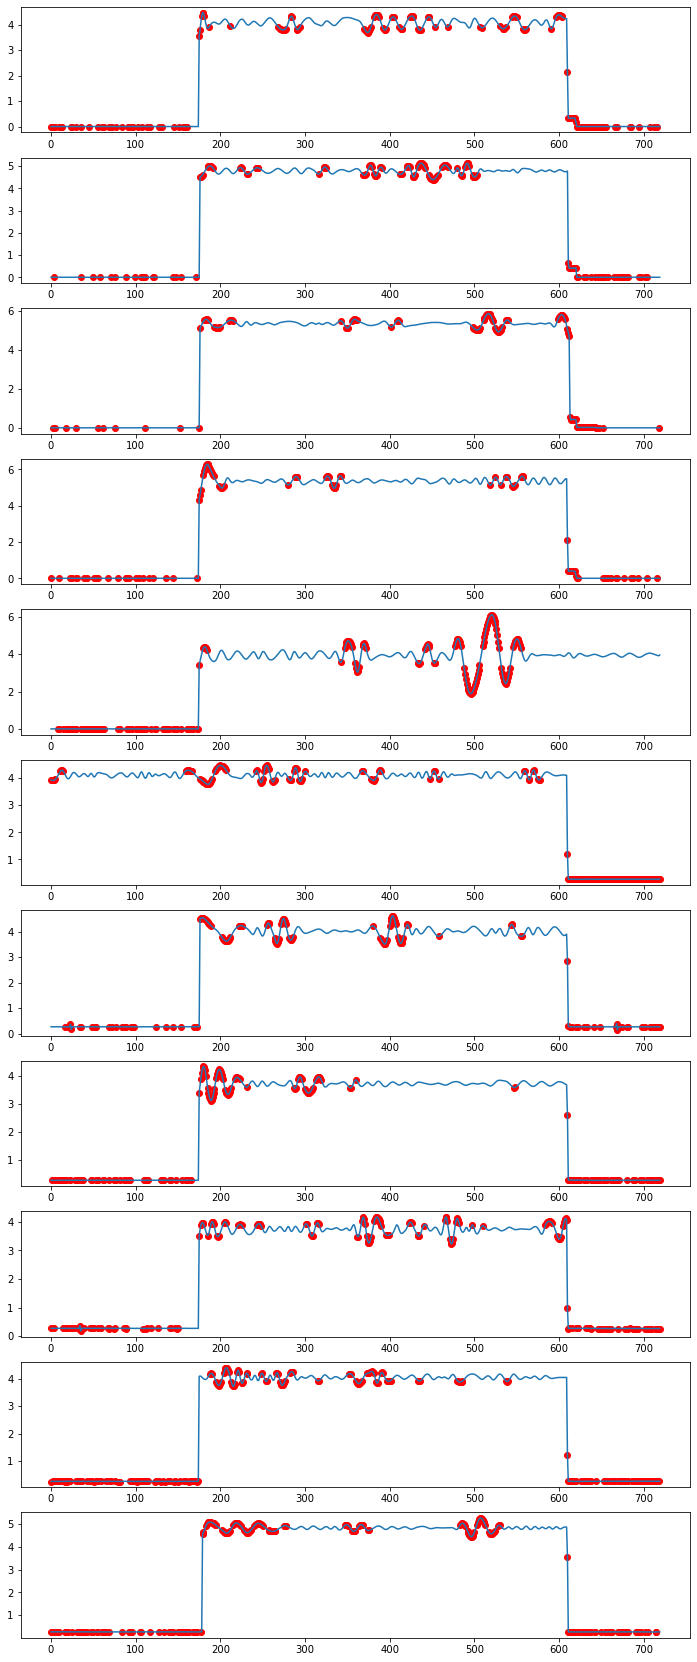

In [15]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на всех

(11, 720, 5)


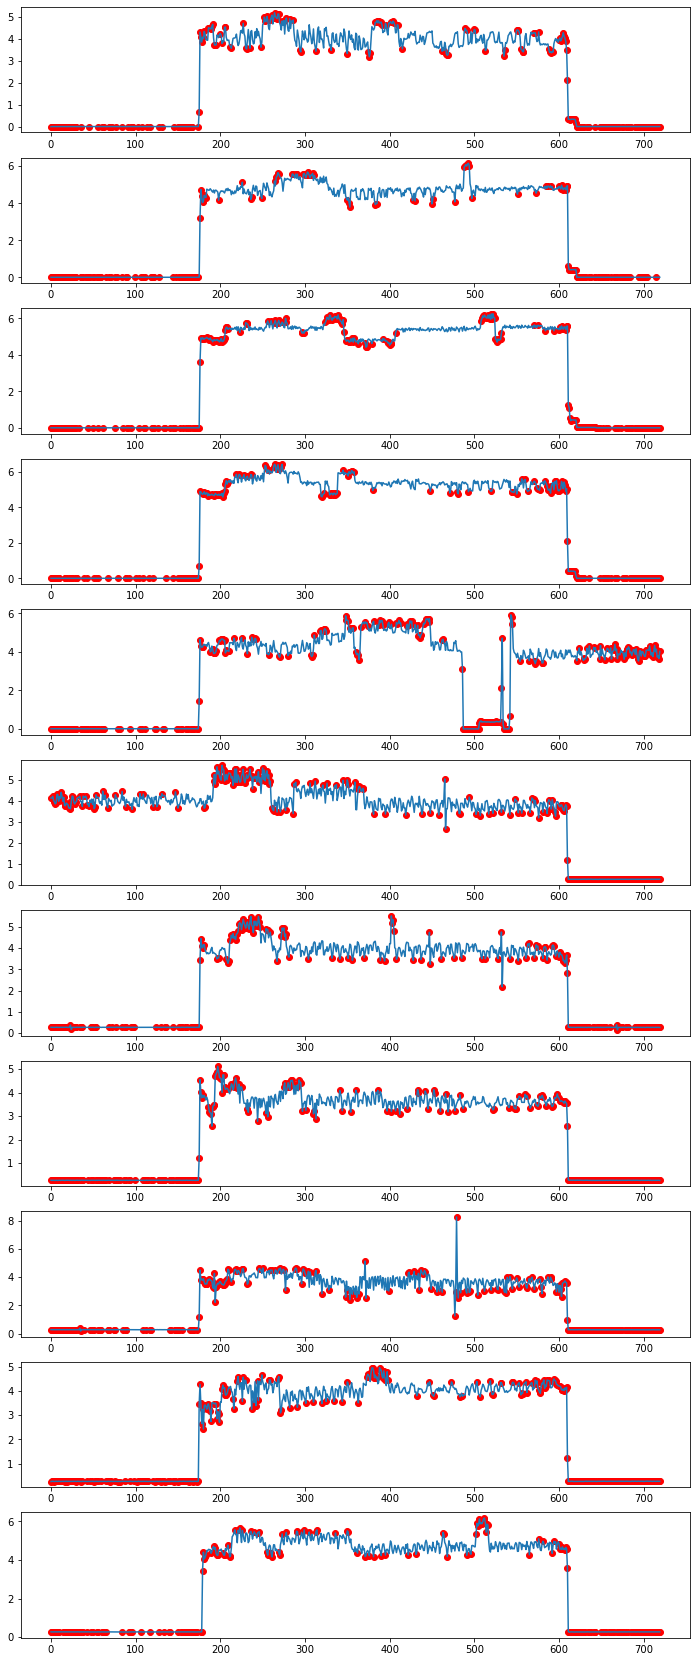

In [16]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на всех

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238
6694 7129 9
7954
7238 7954


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


7414 7845 10
(11, 720, 5)


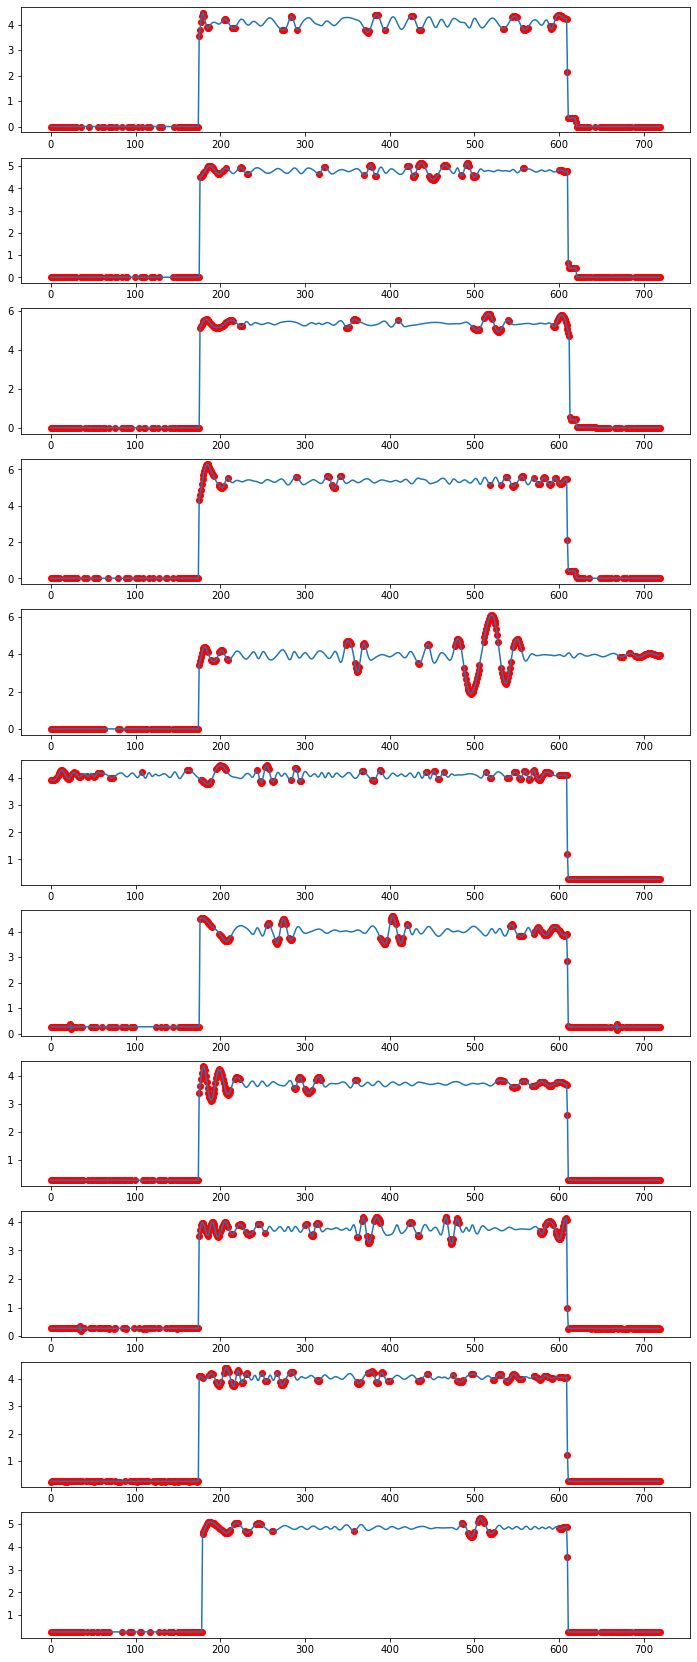

In [18]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, одна размерность, без EMD 
Трейн на норм

[  48  766 1483 2201 2919]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3
(4, 720)
[  48  766 1483 2201 2919 3639 4359 5078 5798 6518 7238 7954]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3
2919 3639 4
3639 4359 5
4359 5078 6
5078 5798 7
5798 6518 8
6518 7238 9
7238 7954 10


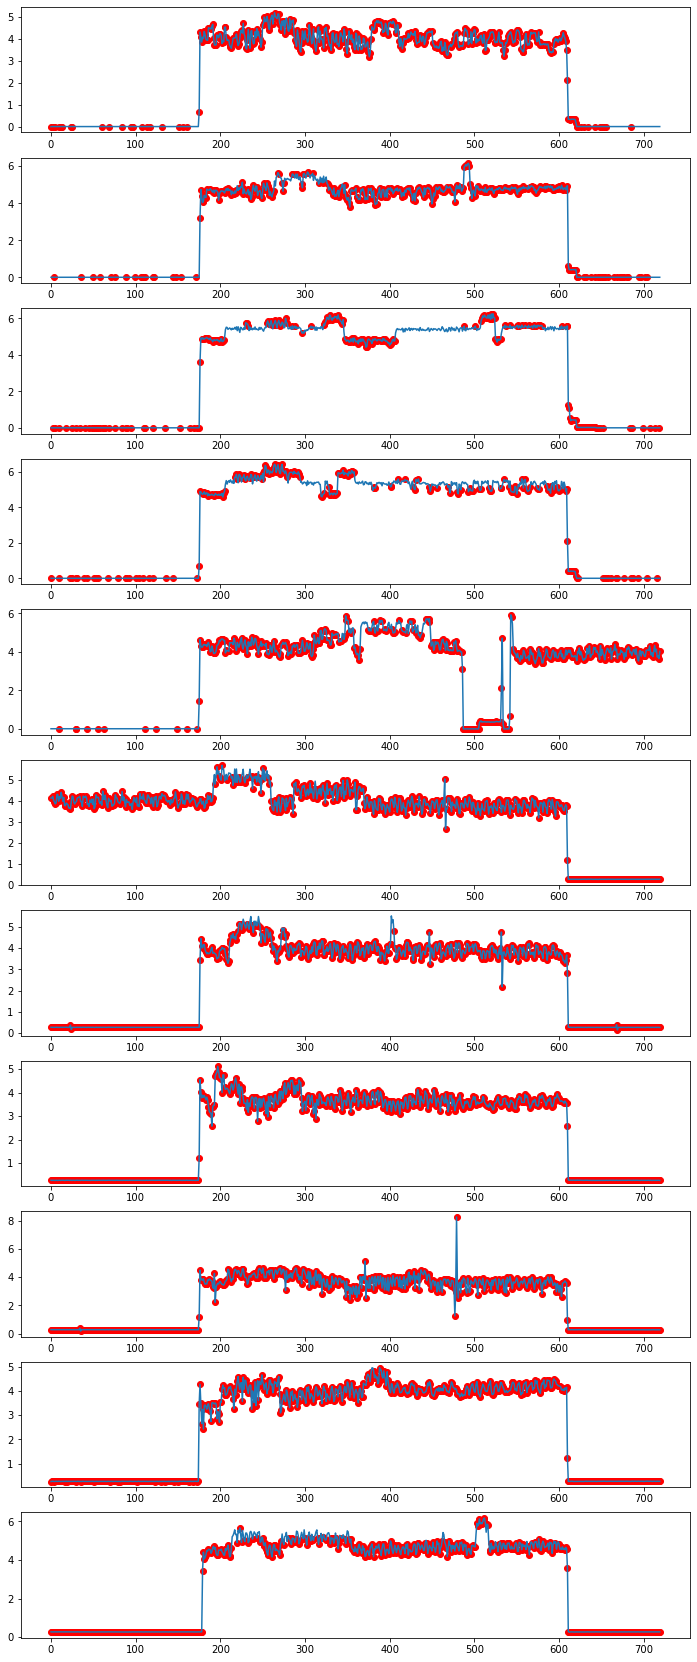

In [19]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на норм

729
0 729
191 640 0
[ 12 729]
12 729 0
(1, 720)
729
0 729
191 640 0
[ 12 729]
12 729 0


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


TypeError: 'AxesSubplot' object is not subscriptable

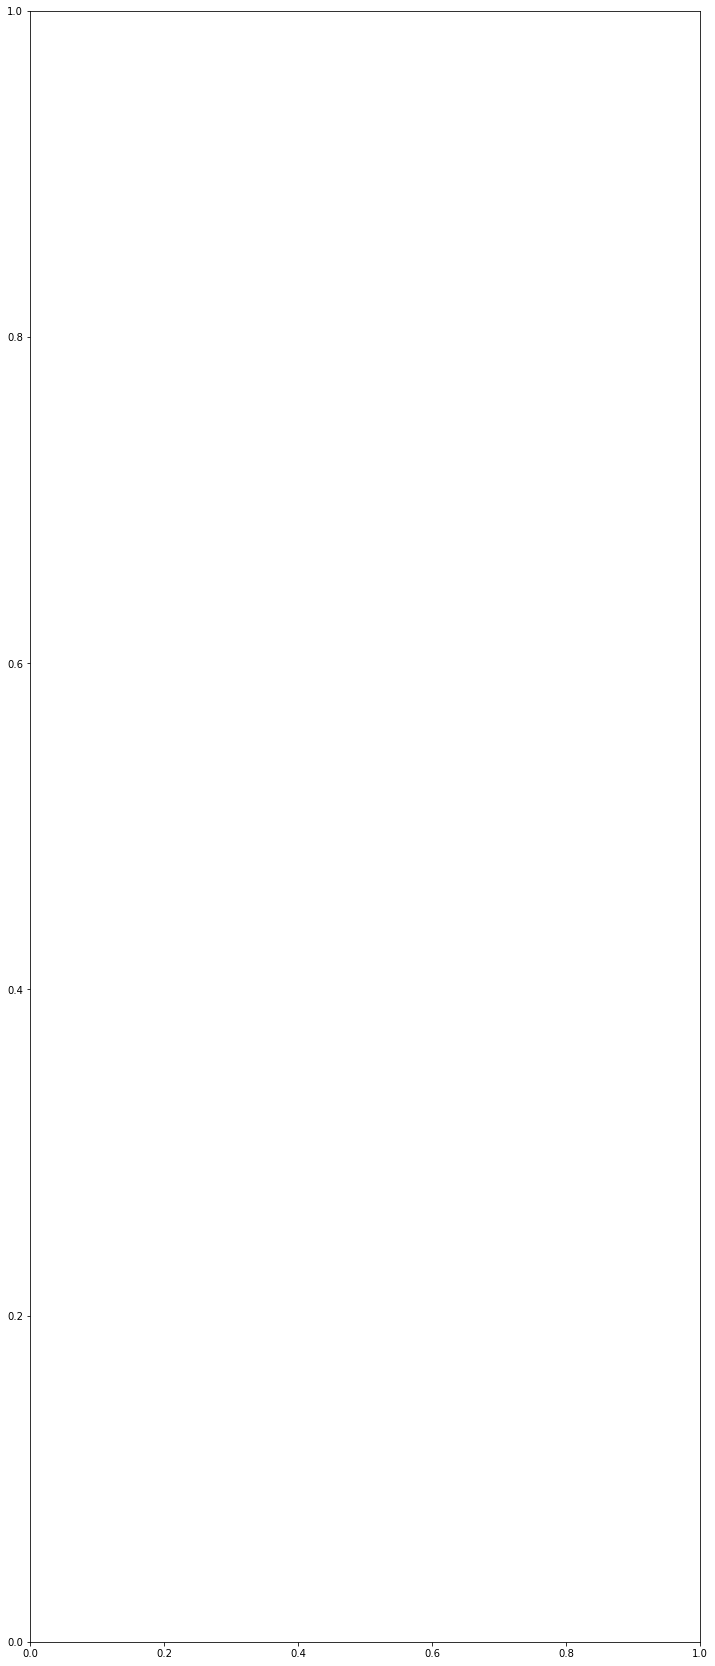

In [27]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на норм

[  12  729 1448 2165 2884 3601]
12 729 0
729 1448 1
1448 2165 2
2165 2884 3
2884 3601 4


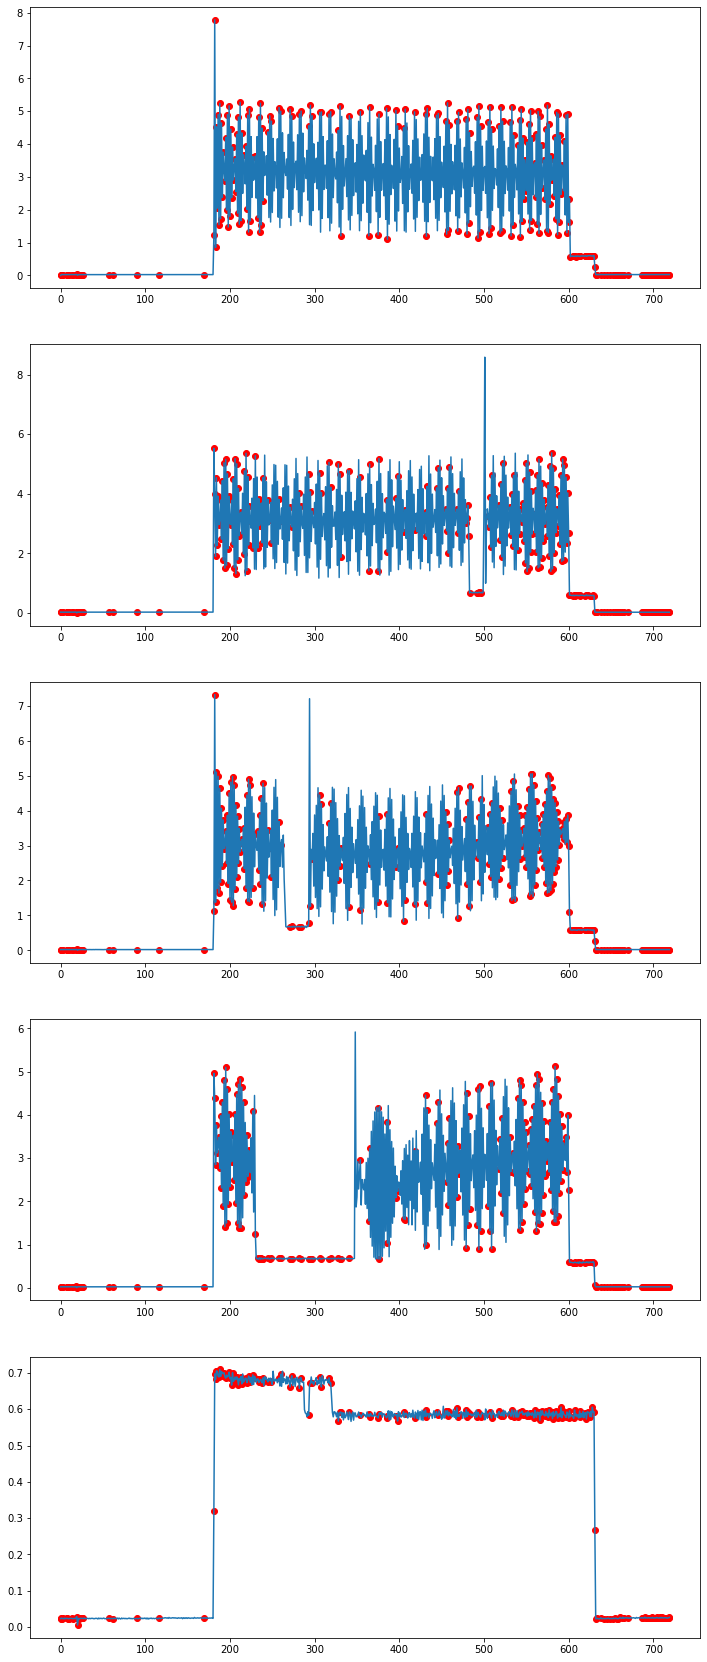

In [28]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на норм

729
0 729
191 640 0
729
0 729
191 640 0
1448
729 1448
910 1359 1
2165
1448 2165
1627 2076 2
2884
2165 2884


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


2346 2795 3
3601
2884 3601
3064 3512 4
[  12  729 1448 2165 2884 3601]
12 729 0
729 1448 1
1448 2165 2
2165 2884 3
2884 3601 4


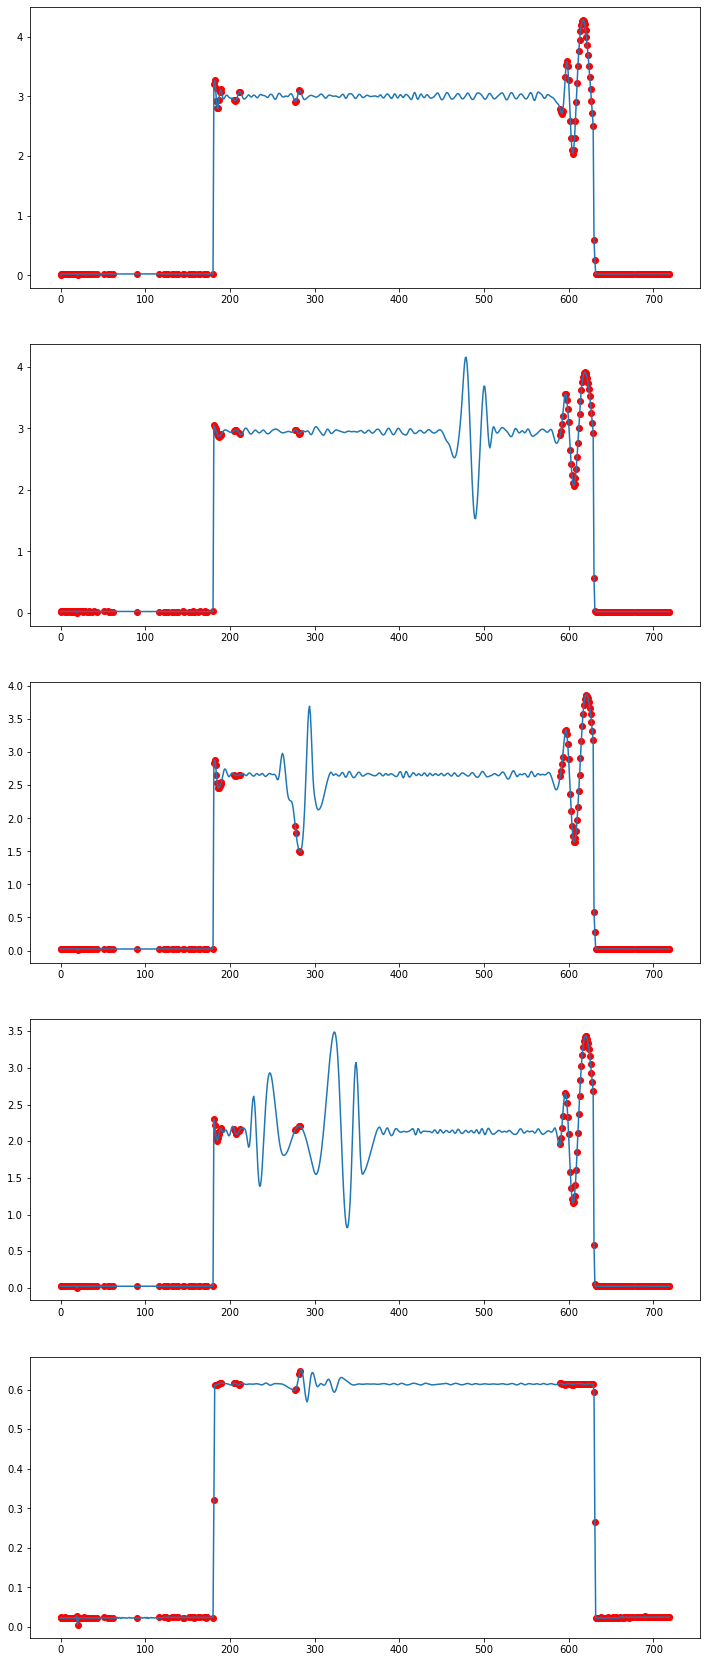

In [29]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1